In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 텍스트 마이닝

KoNLPy를 이용하면, 한나눔, 꼬꼬마 외에도 다양한 형태소 분석기를 이용할 수 있다.
또한 명사, 동사, 형용사 등 다양한 품사를 추출할 수 있다.

형태소 : 언어학에서 일정한 의미가 있는 가장 작은 말의 단위


In [1]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 48.6 MB/s eta 0:00:00


## 대통령 연설문으로 워드 클라우드 만들어 보기

In [2]:
yoon = open('/content/drive/MyDrive/Colab Notebooks/data/president_speech_yoon.txt', encoding='utf-8').read()
yoon

'존경하고 사랑하는 국민 여러분,\n750만 재외동포 여러분,\n그리고 자유를 사랑하는 세계 시민 여러분,\n\n저는 이 나라를 자유민주주의와 시장경제 체제를 기반으로 국민이 진정한 주인인 나라로 재건하고, 국제사회에서 책임과 역할을 다하는 나라로 만들어야 하는 시대적 소명을 갖고 오늘 이 자리에 섰습니다.\n\n역사적인 자리에 함께해 주신 국민 여러분께 감사드립니다.\n\n문재인, 박근혜 전 대통령, 그리고 할리마 야콥 싱가포르 대통령, 포스탱 아르샹쥬 투아데라 중앙아프리카공화국 대통령, 왕치산 중국 국가부주석, 메가와티 수카르노푸트리 인도네시아 전 대통령, 더글러스 엠호프 해리스 미국 부통령 부군, 조지 퓨리 캐나다 상원의장, 하야시 요시마사 일본 외무상을 비롯한 세계 각국의 경축 사절과 내외 귀빈 여러분께도 깊이 감사드립니다.\n\n이 자리를 빌려 지난 2년간 코로나 팬데믹을 극복하는 과정에서 큰 고통을 감내해주신 국민 여러분께 경의를 표합니다.\n그리고 헌신해주신 의료진 여러분께도 감사드립니다.\n\n존경하는 국민 여러분,\n세계 시민 여러분,\n\n지금 전 세계는 팬데믹 위기, 교역 질서의 변화와 공급망의 재편, 기후 변화, 식량과 에너지 위기, 분쟁의 평화적 해결의 후퇴 등 어느 한 나라가 독자적으로,\xa0 또는 몇몇 나라만 참여해서 해결하기 어려운 난제들에 직면해 있습니다.\n\n다양한 위기가 복합적으로 인류 사회에 어두운 그림자를 드리우고 있는 것입니다.\n\n또한 우리나라를 비롯한 많은 나라들이 국내적으로 초저성장과 대규모 실업, 양극화의 심화와 다양한 사회적 갈등으로 인해 공동체의 결속력이 흔들리고 와해되고 있습니다.\n\n한편, 이러한 문제들을 해결해야 하는 정치는 이른바 민주주의의 위기로 인해 제 기능을 하지 못하고 있습니다.\n\n가장 큰 원인으로 지목되는 것이 바로 반지성주의입니다.\n\n견해가 다른 사람들이 서로의 입장을 조정하고 타협하기 위해서는 과학과 진실이 전제되어야 합니다.\n그것이 민주주의를 지탱하는 합리주의와 지성주의입니

In [3]:
# 불필요한 문자 제거하기 위해 정규식 모듈 이용

import re
yoon = re.sub('[^가-힣]', ' ', yoon) # 한글이 아닌 애들을 빈칸으로 변경
yoon

'존경하고 사랑하는 국민 여러분     만 재외동포 여러분  그리고 자유를 사랑하는 세계 시민 여러분   저는 이 나라를 자유민주주의와 시장경제 체제를 기반으로 국민이 진정한 주인인 나라로 재건하고  국제사회에서 책임과 역할을 다하는 나라로 만들어야 하는 시대적 소명을 갖고 오늘 이 자리에 섰습니다   역사적인 자리에 함께해 주신 국민 여러분께 감사드립니다   문재인  박근혜 전 대통령  그리고 할리마 야콥 싱가포르 대통령  포스탱 아르샹쥬 투아데라 중앙아프리카공화국 대통령  왕치산 중국 국가부주석  메가와티 수카르노푸트리 인도네시아 전 대통령  더글러스 엠호프 해리스 미국 부통령 부군  조지 퓨리 캐나다 상원의장  하야시 요시마사 일본 외무상을 비롯한 세계 각국의 경축 사절과 내외 귀빈 여러분께도 깊이 감사드립니다   이 자리를 빌려 지난  년간 코로나 팬데믹을 극복하는 과정에서 큰 고통을 감내해주신 국민 여러분께 경의를 표합니다  그리고 헌신해주신 의료진 여러분께도 감사드립니다   존경하는 국민 여러분  세계 시민 여러분   지금 전 세계는 팬데믹 위기  교역 질서의 변화와 공급망의 재편  기후 변화  식량과 에너지 위기  분쟁의 평화적 해결의 후퇴 등 어느 한 나라가 독자적으로   또는 몇몇 나라만 참여해서 해결하기 어려운 난제들에 직면해 있습니다   다양한 위기가 복합적으로 인류 사회에 어두운 그림자를 드리우고 있는 것입니다   또한 우리나라를 비롯한 많은 나라들이 국내적으로 초저성장과 대규모 실업  양극화의 심화와 다양한 사회적 갈등으로 인해 공동체의 결속력이 흔들리고 와해되고 있습니다   한편  이러한 문제들을 해결해야 하는 정치는 이른바 민주주의의 위기로 인해 제 기능을 하지 못하고 있습니다   가장 큰 원인으로 지목되는 것이 바로 반지성주의입니다   견해가 다른 사람들이 서로의 입장을 조정하고 타협하기 위해서는 과학과 진실이 전제되어야 합니다  그것이 민주주의를 지탱하는 합리주의와 지성주의입니다   국가 간  국가 내부의 지나친 집단적 갈등에 의

In [4]:
# 명사를 추출하기

import konlpy
hannanum = konlpy.tag.Hannanum()
hannanum.nouns("대한민국의 주권은 국민에게 있다")

['대한민국', '주권', '국민']

In [6]:
nouns = hannanum.nouns(yoon)
print(type(nouns))

<class 'list'>


In [7]:
import pandas as pd

df_word = pd.DataFrame({'word' : nouns})
df_word

,word
0,존경
1,사랑
2,국민
3,여러분
4,재외동포
...,...
591,나라
592,위대한
593,국민
594,여러분


In [11]:
# 글자 수 추가
df_word['count'] = df_word['word'].str.len()
# 두글자 이상 단어만 남기기
df_word = df_word.query('count > 1')
df_word.sort_values('count')

<ipython-input-11-01c6c31a23d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word['count'] = df_word['word'].str.len()


,word,count
0,존경,2
385,국민,2
384,과정,2
383,성장,2
382,생각,2
...,...,...
440,자유민주주의,6
13,자유민주주의,6
407,자유민주주의,6
51,수카르노푸트리,7


In [14]:
df_word = df_word.groupby('word', as_index = False).agg( n = ('word', 'count')).sort_values('n', ascending=False)
df_word

,word,n
180,자유,30
148,여러분,16
34,국민,15
132,시민,15
160,우리,14
...,...,...
106,불법,1
109,빈곤,1
112,사실만,1
113,사절,1


In [15]:
top20 = df_word.head(20)
top20

,word,n
180,자유,30
148,여러분,16
34,국민,15
132,시민,15
160,우리,14
123,세계,13
231,평화,10
242,해결,9
199,존경,7
1,가치,7


<Axes: xlabel='n', ylabel='word'>

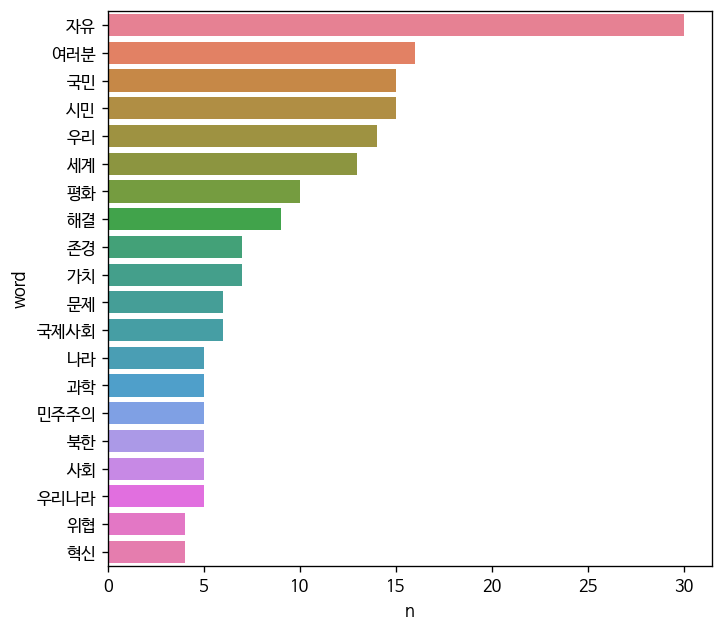

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family': 'NanumBarunGothic',
                     'figure.dpi': '120',
                     'figure.figsize': [6.5, 6]})

sns.barplot(data = top20, y ='word', x ='n', hue = 'word')

In [18]:
!pip install wordcloud

In [ ]:
# 단어와 빈도를 담은 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

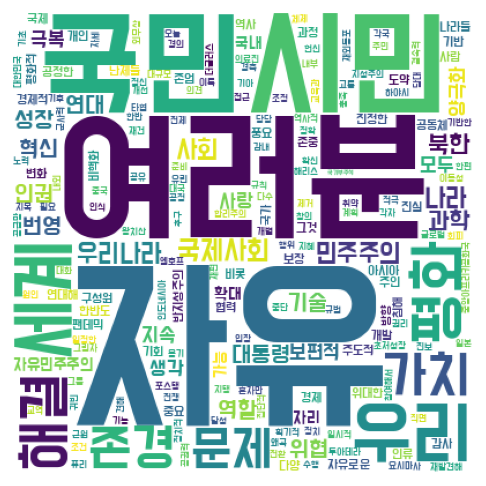

In [25]:
# 워드 클라우드 만들기

from wordcloud import WordCloud
wc = WordCloud(random_state=1234,
               font_path='/content/drive/MyDrive/Colab Notebooks/DoHyeon-Regular.ttf',
               width = 400,
               height = 400,
               background_color='white')
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(img_wordcloud)

In [29]:
# masking 작업
import PIL
import numpy as np

icon = PIL.Image.open('/content/drive/MyDrive/Colab Notebooks/KakaoTalk_20240311_094118904.png')
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

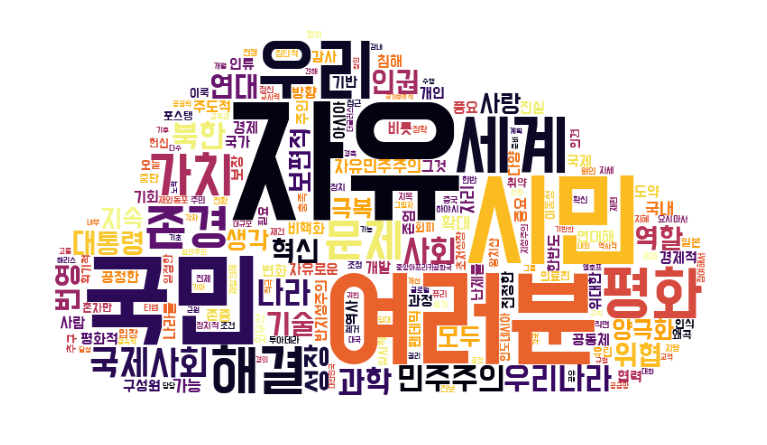

In [32]:
# 이미지를 적용해서 워드클라우드 만들기
wc = WordCloud(random_state=1234,
               font_path='/content/drive/MyDrive/Colab Notebooks/DoHyeon-Regular.ttf',
               width = 400,
               height = 400,
               background_color='white',
               mask = img,
               colormap = 'inferno')
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(img_wordcloud)

# FigurePress 후기 제목 텍스트 마이닝


In [44]:
from bs4 import BeautifulSoup
import requests

import pandas as pd
df = pd.DataFrame()

for page in range(1, 21) :
  url = 'https://figurepresso.com/board/product/list.html?board_no=4&page=' + str(page)
  headers = {'User-Agent' : 'Mozilla/5.0'}

  response = requests.get(url, headers=headers)

  # df = df.append(pd.read_html(response.text, header=0)[0], ignore_index=True) # deprecate
  df = pd.concat([df, pd.read_html(response.text, header=0)[0]], ignore_index=True)

df

,번호,상품정보,카테고리,제목,작성자,작성일,조회,추천,평점
0,708,NaN,NaN,[입고완료][후류][헌터×헌터] 누들 스토퍼 피규어 히소카 (재판) 컵라면 야무지...,배****,2024-03-06,6,0,NaN
1,707,NaN,NaN,[입고완료][피규어프레소][먼작귀/치이카와] 정식 라이센스 스틱 포스터 컬렉션 단품...,김****,2024-03-05,4,0,NaN
2,706,NaN,NaN,[입고완료][반프레스토][나루토 질풍전] 바이브레이션 스타즈 하루노 사쿠라 2 너...,김****,2024-03-02,8,0,NaN
3,705,NaN,NaN,[입고완료][반프레스토][원피스] 월드 콜렉터블 피규어 와노쿠니 완결편 2 D 첫...,이****,2024-02-29,4,0,NaN
4,704,NaN,NaN,[입고완료][맥스팩토리][Fate/Grand Order] POP UP PARADE ...,김****,2024-02-27,19,0,NaN
...,...,...,...,...,...,...,...,...,...
295,413,NaN,NaN,[입고완료][반프레스토][소드 아트 온라인 메모리 디프래그] EXQ 피규어 앨리스 ...,이****,2022-05-10,56,0,NaN
296,412,NaN,NaN,[입고완료][굿스마일컴퍼니] 프린세스 커넥트! Re : Dive 넨도로이드 No.1...,이****,2022-05-10,66,0,NaN
297,411,NaN,NaN,[입고완료][타이토][Re:제로부터 시작하는 이세계 생활] 렘 팩 이미지 Ver. ...,권****,2022-05-05,67,0,NaN
298,410,NaN,NaN,[입고완료][굿스마일컴퍼니][Fate/stay night] 토오사카 린 UNLIMI...,권****,2022-05-02,145,0,NaN


In [36]:
df.shape

(30, 9)

In [45]:
title_raw = df.제목.str
title = title_raw[len("[입고완료]") : ]
title

0      [후류][헌터×헌터] 누들 스토퍼 피규어 히소카 (재판)  컵라면 야무지게 끓여줄 ...
1      [피규어프레소][먼작귀/치이카와] 정식 라이센스 스틱 포스터 컬렉션 단품 (2장/랜...
2      [반프레스토][나루토 질풍전] 바이브레이션 스타즈 하루노 사쿠라 2  너무 마음에 ...
3      [반프레스토][원피스] 월드 콜렉터블 피규어 와노쿠니 완결편 2 D  첫 월콜 크로커다일
4      [맥스팩토리][Fate/Grand Order] POP UP PARADE 어벤저/잔다...
                             ...                        
295    [반프레스토][소드 아트 온라인 메모리 디프래그] EXQ 피규어 앨리스 신서시스 서...
296    [굿스마일컴퍼니] 프린세스 커넥트! Re : Dive 넨도로이드 No.1678 페코...
297      [타이토][Re:제로부터 시작하는 이세계 생활] 렘 팩 이미지 Ver.  정말 이뻐요
298    [굿스마일컴퍼니][Fate/stay night] 토오사카 린 UNLIMITED BL...
299    [굿스마일컴퍼니][귀멸의 칼날] 넨도로이드 No.1655 코쵸우 시노부  시노부 넨...
Name: 제목, Length: 300, dtype: object

In [46]:
df_re = df.copy()
df_re['제목'] = title
df_re

,번호,상품정보,카테고리,제목,작성자,작성일,조회,추천,평점
0,708,NaN,NaN,[후류][헌터×헌터] 누들 스토퍼 피규어 히소카 (재판) 컵라면 야무지게 끓여줄 ...,배****,2024-03-06,6,0,NaN
1,707,NaN,NaN,[피규어프레소][먼작귀/치이카와] 정식 라이센스 스틱 포스터 컬렉션 단품 (2장/랜...,김****,2024-03-05,4,0,NaN
2,706,NaN,NaN,[반프레스토][나루토 질풍전] 바이브레이션 스타즈 하루노 사쿠라 2 너무 마음에 ...,김****,2024-03-02,8,0,NaN
3,705,NaN,NaN,[반프레스토][원피스] 월드 콜렉터블 피규어 와노쿠니 완결편 2 D 첫 월콜 크로커다일,이****,2024-02-29,4,0,NaN
4,704,NaN,NaN,[맥스팩토리][Fate/Grand Order] POP UP PARADE 어벤저/잔다...,김****,2024-02-27,19,0,NaN
...,...,...,...,...,...,...,...,...,...
295,413,NaN,NaN,[반프레스토][소드 아트 온라인 메모리 디프래그] EXQ 피규어 앨리스 신서시스 서...,이****,2022-05-10,56,0,NaN
296,412,NaN,NaN,[굿스마일컴퍼니] 프린세스 커넥트! Re : Dive 넨도로이드 No.1678 페코...,이****,2022-05-10,66,0,NaN
297,411,NaN,NaN,[타이토][Re:제로부터 시작하는 이세계 생활] 렘 팩 이미지 Ver. 정말 이뻐요,권****,2022-05-05,67,0,NaN
298,410,NaN,NaN,[굿스마일컴퍼니][Fate/stay night] 토오사카 린 UNLIMITED BL...,권****,2022-05-02,145,0,NaN


In [47]:
# 불필요한 문자 제거

df_re['제목'] = df_re['제목'].str.replace('[^가-힣]', ' ', regex = True)
df_re.head()

,번호,상품정보,카테고리,제목,작성자,작성일,조회,추천,평점
0,708,NaN,NaN,후류 헌터 헌터 누들 스토퍼 피규어 히소카 재판 컵라면 야무지게 끓여줄 ...,배****,2024-03-06,6,0,NaN
1,707,NaN,NaN,피규어프레소 먼작귀 치이카와 정식 라이센스 스틱 포스터 컬렉션 단품 장 랜...,김****,2024-03-05,4,0,NaN
2,706,NaN,NaN,반프레스토 나루토 질풍전 바이브레이션 스타즈 하루노 사쿠라 너무 마음에 ...,김****,2024-03-02,8,0,NaN
3,705,NaN,NaN,반프레스토 원피스 월드 콜렉터블 피규어 와노쿠니 완결편 첫 월콜 크로커다일,이****,2024-02-29,4,0,NaN
4,704,NaN,NaN,맥스팩토리 어벤저 잔다...,김****,2024-02-27,19,0,NaN


In [48]:
# 명사 추출
# 꼬꼬마 (Kkma) 형태소 분석기 : 띄어쓰기 오류가 있는 문장에서도 형태소를 잘 추출하는 장점이 있다.

kkma = konlpy.tag.Kkma()

# apply() 함수 : 각행에 함수를 적용

nouns = df_re['제목'].apply(kkma.nouns)
nouns

0      [후, 터, 누들, 스토퍼, 피, 피규, 규, 히, 히소카, 소, 카, 재판, 컵,...
1      [피, 피규, 규, 프, 프레소, 레, 소, 작, 작귀, 귀, 치이카, 정식, 라이...
2      [반, 반프레스토, 프레스토, 나루토, 질풍, 질풍전, 전, 바이브레이션, 스타, ...
3      [반, 반프레스토, 프레스토, 원피스, 월드, 콜, 콜렉, 렉, 피, 피규, 규, ...
4                [맥스, 맥스팩토리, 팩토리, 잔, 잔다르크, 다르크, 오르타, 배송]
                             ...                        
295    [반, 반프레스토, 프레스토, 소드, 아트, 온라인, 메모리, 디, 디프래, 프래,...
296    [굿, 굿스마일컴퍼니, 스마일, 컴퍼니, 프린세스, 넥트, 넨, 넨도로이드, 도로,...
297              [타이, 타이토, 토, 제로, 시작, 세계, 생활, 렘, 팩, 이미지]
298      [굿, 굿스마일컴퍼니, 스마일, 컴퍼니, 토, 토오사카, 오사카, 린, 만족, 구매]
299    [굿, 굿스마일컴퍼니, 스마일, 컴퍼니, 귀멸, 칼날, 넨, 넨도로이드, 도로, 이...
Name: 제목, Length: 300, dtype: object

In [49]:
# df.explode()를 이용해서 한행에 한단어만 들어가도록 하기

nouns = nouns.explode()
nouns

0        후
0        터
0       누들
0      스토퍼
0        피
      ... 
299      우
299      시
299    시노부
299     노부
299     리뷰
Name: 제목, Length: 4283, dtype: object

In [53]:
# nouns를 DataFrame으로 만들기
# 두글자 이상으로된 단어만 남기고 단어 빈도표 만들기

df_word = pd.DataFrame({'word' : nouns})

df_word['count'] = df_word['word'].str.len()

df_word = df_word.query('count > 1')
df_word


,word,count
0,누들,2.0
0,스토퍼,3.0
0,피규,2.0
0,히소카,3.0
0,재판,2.0
...,...,...
299,이드,2.0
299,코쵸우,3.0
299,시노부,3.0
299,노부,2.0


In [56]:
# 빈도표를 만들기

df_word = df_word.groupby('word', as_index = False).agg(n= ('word', 'count')).sort_values('n', ascending = False)
df_word

,word,n
899,피규,86
318,반프레스토,83
887,프레스토,83
438,스마일,56
645,이드,56
...,...,...
439,스미스,1
441,스이세이,1
442,스이세이세키,1
443,스이쨩,1


In [57]:
top20 = df_word.head(20)
top20

,word,n
899,피규,86
318,반프레스토,83
887,프레스토,83
438,스마일,56
645,이드,56
43,굿스마일컴퍼니,53
784,컴퍼니,53
109,도로,34
75,넨도로이드,34
44,귀멸,32


<Axes: xlabel='n', ylabel='word'>

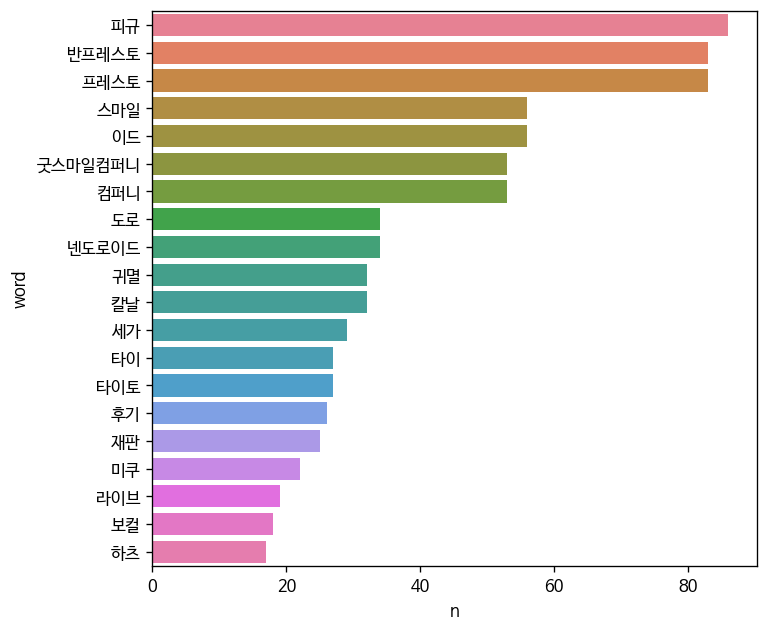

In [58]:
plt.rcParams.update({'font.family': 'NanumBarunGothic',
                     'figure.dpi': '120',
                     'figure.figsize': [6.5, 6]})

sns.barplot(data = top20, y ='word', x ='n', hue = 'word')

In [ ]:
# 단어와 빈도를 담은 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

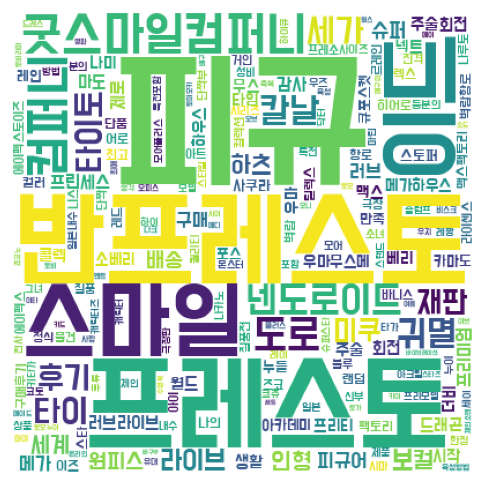

In [60]:
# 워드 클라우드 만들기

from wordcloud import WordCloud
wc = WordCloud(random_state=1234,
               font_path='/content/drive/MyDrive/Colab Notebooks/DoHyeon-Regular.ttf',
               width = 400,
               height = 400,
               background_color='white')
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(img_wordcloud)

In [61]:
# masking 작업
import PIL
import numpy as np

icon = PIL.Image.open('/content/drive/MyDrive/Colab Notebooks/KakaoTalk_20240311_094118904.png')
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

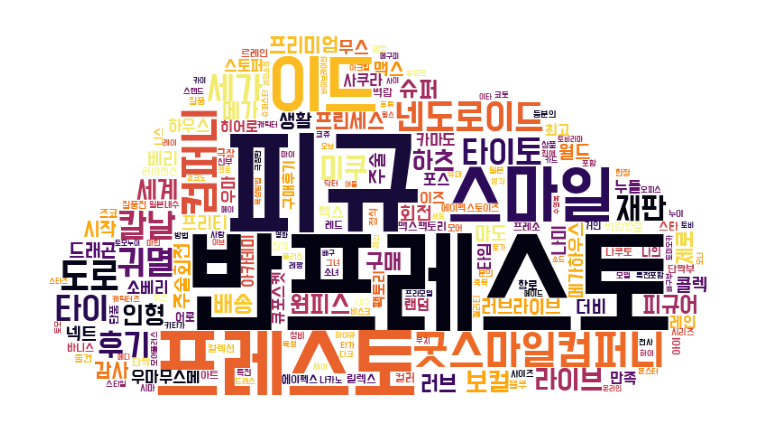

In [62]:
# 이미지를 적용해서 워드클라우드 만들기
wc = WordCloud(random_state=1234,
               font_path='/content/drive/MyDrive/Colab Notebooks/DoHyeon-Regular.ttf',
               width = 400,
               height = 400,
               background_color='white',
               mask = img,
               colormap = 'inferno')
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(img_wordcloud)